In [1]:
import sys
sys.path.append("../code/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from create_matrix import *
from common import create_region_df_dfc_static

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']

import os

In [4]:
def get_tensor(df):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())

    #dfc = df.copy()

    df = df[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [28]:
region = 'Austin'
year = 2014

df, dfc, tensor, static_region = create_region_df_dfc_static(region, year, start=1, stop=13)

In [29]:
from tensor_custom_core import learn_HBAT_adagrad_graph

In [40]:
H, B, A, T, Hs, As, Ts, HBATs, costs = learn_HBAT_adagrad_graph(tensor, 1, 2, lr = 1, dis=True)

498.8596407
95.4554919051
94.7721561621
94.7395345622
94.7378798223
94.737728652
94.7377103146
94.7377039701
94.7376988217
94.737693856
94.7376889479
94.7376840669
94.7376792025
94.7376743515
94.7376695131
94.737664687
94.7376598733
94.7376550719
94.7376502828
94.737645506


In [18]:
%matplotlib inline

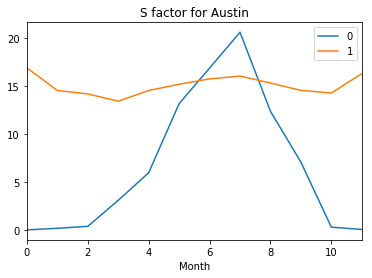

In [68]:
pd.DataFrame(T).T.plot()
plt.xlabel("Month")
plt.title("S factor for Austin")

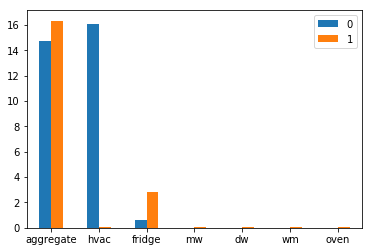

In [72]:
pd.DataFrame(A, index=APPLIANCES_ORDER).plot(kind='bar', rot=0)

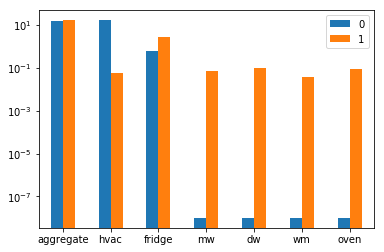

In [76]:
pd.DataFrame(A, index=APPLIANCES_ORDER).plot(kind='bar', rot=0, logy=True)
#plt.ylim((0, 0.1))

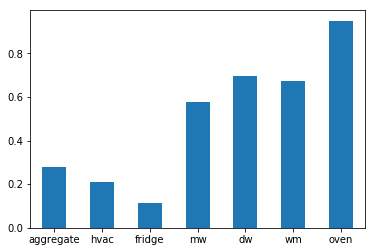

In [80]:
e = pd.DataFrame(B).squeeze()
e.index = APPLIANCES_ORDER
e.plot(kind='bar',rot=0)

In [57]:
B.shape

(1, 7)

In [38]:
A.shape

(7, 2)

In [60]:
pd.DataFrame(H).corrwith(pd.Series(static_region[:,0]))

0    0.764875
dtype: float64

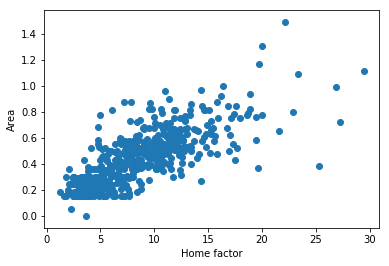

In [69]:
plt.scatter(pd.DataFrame(H), pd.Series(static_region[:,0]))
plt.xlabel("Home factor")
plt.ylabel("Area")